# Monthly Playlist Analysis

> Todo
> - `sp.playlist` only returns first 100 tracks. Not sure there's a way to offset the spotipy

## 0.0 Imports & Setup

### 0.1 Imports

In [1]:
import numpy as np
import pandas as pd
import datetime
import time
from matplotlib import pyplot as plt
import matplotlib
from tqdm import tqdm
import os

from src.playlists import MonthlyPlaylistHandler, MonthlyPlaylist

### 0.2 Setup

In [3]:
mpl = MonthlyPlaylistHandler()
sp = mpl.spotify_client

## 1.0 Demonstration

### 1.1 Download and read playlist metadata

In [27]:
mpl.get_monthly_playlists()

df_mpls = mpl.read_monthly_playlists()

df_mpls

/Users/hugoneely/Documents/Coding/spotify-project/src/playlists.py:202: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date']).dt.date


date            name  \
id                                                   
1ZuOGhyyL9u6nZMkrPOaXi  2025-10-01    October 2025   
7gKE5N6YKBxYPn0mT9kFBo  2025-09-01  September 2025   
1PCGDpdCdvZYfi2mvXmfcX  2025-08-01     August 2025   
32eRKtHIGg5ZS18jE1tIC3  2025-07-01       July 2025   
1dAKocsMZ2g4AqkY9nV906  2025-06-01       June 2025   
...                            ...             ...   
2FPpIykbTksWiEpQOoo0IX  2018-05-01        may 2018   
5TKjuQprN0KrP6JODUDgv0  2018-04-01      april 2018   
2KrIMSlTHz7UTUT8y1CjCP  2018-03-01      march 2018   
7JsfpKz6hajnT1PpUUPHrb  2018-02-01   february 2018   
5IG5IXvM6LK8Q7U4Bsb738  2018-01-01    january 2018   

                                       description  n_tracks  \
id                                                             
1ZuOGhyyL9u6nZMkrPOaXi                         NaN         6   
7gKE5N6YKBxYPn0mT9kFBo        corporate grovelling        36   
1PCGDpdCdvZYfi2mvXmfcX                disaugusting        34   
32eRKtHIGg5ZS18jE1tIC3       good problems to have        51   
1dAKocsMZ2g4AqkY9nV906  it seems perhaps they will        65   
...                                            ...       ...   
2FPpIykbTksWiEpQOoo0IX                  pv = n r t        30   
5TKjuQprN0KrP6JODUDgv0                 shacking up        37   
2KrIMSlTHz7UTUT8y1CjCP         beats from the east        38   
7JsfpKz6hajnT1PpUUPHrb              reeperbahngers        38   
5IG5IXvM6LK8Q7U4Bsb738  deadbodyinthesuicideforest        18   

                                                                      url  \
id                                                                          
1ZuOGhyyL9u6nZMkrPOaXi  https://api.spotify.com/v1/playlists/1ZuOGhyyL...   
7gKE5N6YKBxYPn0mT9kFBo  https://api.spotify.com/v1/playlists/7gKE5N6YK...   
1PCGDpdCdvZYfi2mvXmfcX  https://api.spotify.com/v1/playlists/1PCGDpdCd...   
32eRKtHIGg5ZS18jE1tIC3  https://api.spotify.com/v1/playlists/32eRKtHIG...   
1dAKocsMZ2g4AqkY9nV906  https://api.spotify.com/v1/playlists/1dAKocsMZ...   
...                                                                   ...   
2FPpIykbTksWiEpQOoo0IX  https://api.spotify.com/v1/playlists/2FPpIykbT...   
5TKjuQprN0KrP6JODUDgv0  https://api.spotify.com/v1/playlists/5TKjuQprN...   
2KrIMSlTHz7UTUT8y1CjCP  https://api.spotify.com/v1/playlists/2KrIMSlTH...   
7JsfpKz6hajnT1PpUUPHrb  https://api.spotify.com/v1/playlists/7JsfpKz6h...   
5IG5IXvM6LK8Q7U4Bsb738  https://api.spotify.com/v1/playlists/5IG5IXvM6...   

                                                          cover_image_url  \
id                                                                          
1ZuOGhyyL9u6nZMkrPOaXi  https://image-cdn-ak.spotifycdn.com/image/ab67...   
7gKE5N6YKBxYPn0mT9kFBo  https://image-cdn-ak.spotifycdn.com/image/ab67...   
1PCGDpdCdvZYfi2mvXmfcX  https://image-cdn-ak.spotifycdn.com/image/ab67...   
32eRKtHIGg5ZS18jE1tIC3  https://image-cdn-ak.spotifycdn.com/image/ab67...   
1dAKocsMZ2g4AqkY9nV906  https://image-cdn-ak.spotifycdn.com/image/ab67...   
...                                                                   ...   
2FPpIykbTksWiEpQOoo0IX  https://image-cdn-fa.spotifycdn.com/image/ab67...   
5TKjuQprN0KrP6JODUDgv0  https://image-cdn-ak.spotifycdn.com/image/ab67...   
2KrIMSlTHz7UTUT8y1CjCP  https://image-cdn-ak.spotifycdn.com/image/ab67...   
7JsfpKz6hajnT1PpUUPHrb  https://image-cdn-ak.spotifycdn.com/image/ab67...   
5IG5IXvM6LK8Q7U4Bsb738  https://image-cdn-ak.spotifycdn.com/image/ab67...   

                                             snapshot_id  
id                                                        
1ZuOGhyyL9u6nZMkrPOaXi  AAAACDft4IwcTGO3u3tm8j8PgcdGoneJ  
7gKE5N6YKBxYPn0mT9kFBo  AAAALGmKtp986hmTgJFSus2jvXDZW3Yy  
1PCGDpdCdvZYfi2mvXmfcX  AAAAKcx0r02VEirIzO/nt23SHVb5180H  
32eRKtHIGg5ZS18jE1tIC3  AAAAObVlPqOjK1N5NJHqHtn5SDZb8p9D  
1dAKocsMZ2g4AqkY9nV906  AAAATonlWMYADrWYH0pgK67Tguhmo7ic  
...                                                  ...  
2FPpIykbTksWiEpQOo

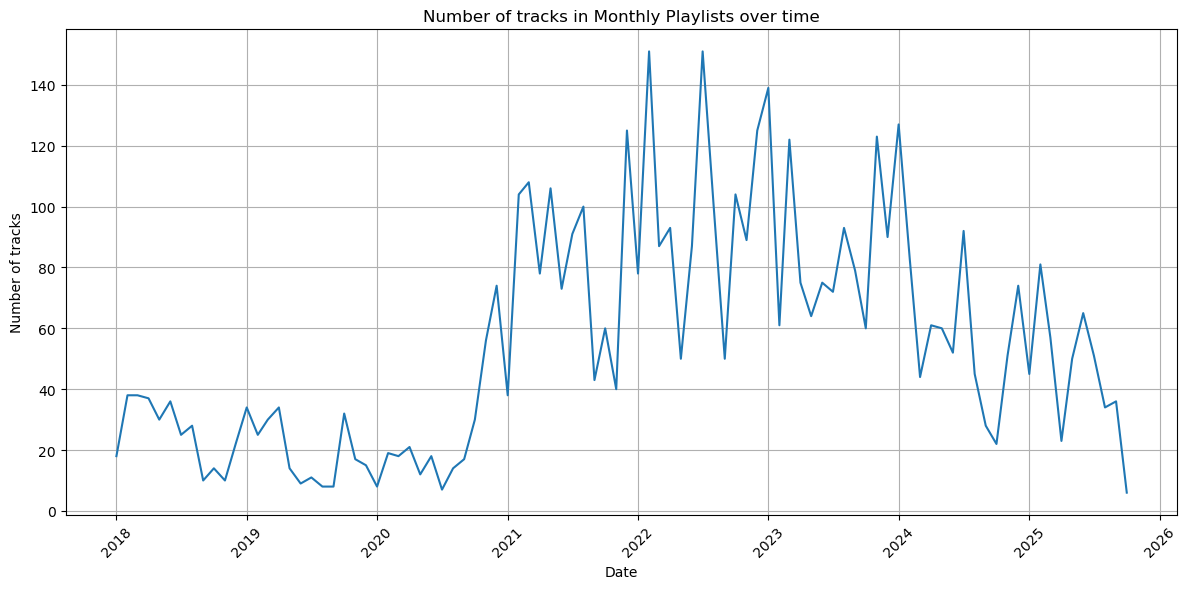

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(pd.to_datetime(df_mpls['date']).dt.date, df_mpls['n_tracks'])
ax.set_title('Number of tracks in Monthly Playlists over time')
ax.set_xlabel('Date')
ax.set_ylabel('Number of tracks')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()  

### 1.2 Plot playlist cover calendar

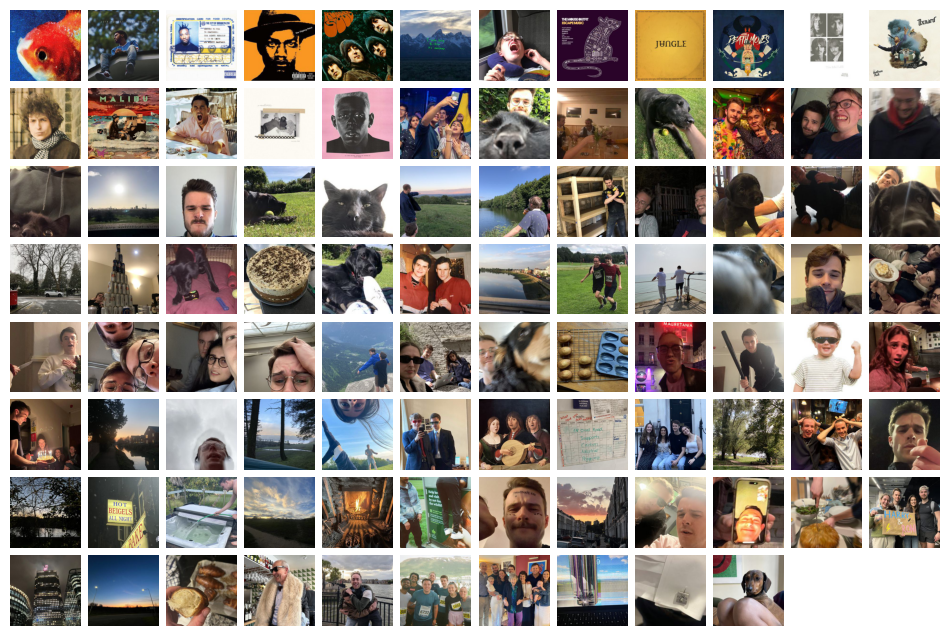

In [532]:
fig, axs = mpl.plot_playlist_covers(wspace=0.1, hspace=0.1)
plt.show()

### 1.3 Tracks

In [11]:
df_tracks = mpl.read_tracks(download_if_required=True)
df_tracks

track_names             track_artists  \
0     Goodums - Sammy Virji Remix                 Unknown T   
1     Goodums - Sammy Virji Remix               Sammy Virji   
2           Send My Love to Linda              Jimi Hendrix   
3                        No Merci               Little Simz   
4                 Stunt Like This              Young Franco   
...                           ...                       ...   
6967                    Two Words                   Mos Def   
6968                    Two Words                   Freeway   
6969                    Two Words  The Boys Choir Of Harlem   
6970            Lie, Cheat, Steal            Run The Jewels   
6971           Look Mama I Did It            Injury Reserve   

              track_date_added             playlist_id playlist_name  \
0    2025-10-02 15:55:52+00:00  1ZuOGhyyL9u6nZMkrPOaXi  October 2025   
1    2025-10-02 15:55:52+00:00  1ZuOGhyyL9u6nZMkrPOaXi  October 2025   
2    2025-10-02 15:56:35+00:00  1ZuOGhyyL9u6nZMkrPOaXi  October 2025   
3    2025-10-02 15:56:46+00:00  1ZuOGhyyL9u6nZMkrPOaXi  October 2025   
4    2025-10-02 17:24:02+00:00  1ZuOGhyyL9u6nZMkrPOaXi  October 2025   
...                        ...                     ...           ...   
6967 2018-01-17 18:15:42+00:00  5IG5IXvM6LK8Q7U4Bsb738  january 2018   
6968 2018-01-17 18:15:42+00:00  5IG5IXvM6LK8Q7U4Bsb738  january 2018   
6969 2018-01-17 18:15:42+00:00  5IG5IXvM6LK8Q7U4Bsb738  january 2018   
6970 2018-01-31 17:23:09+00:00  5IG5IXvM6LK8Q7U4Bsb738  january 2018   
6971 2018-01-31 17:27:12+00:00  5IG5IXvM6LK8Q7U4Bsb738  january 2018   

      track_index  track_artists_index       track_artist_spid  \
0               1                    1  3iAhNz3e31lBuXYOsqGsf3   
1               1                    2  1GuqTQbuixFHD6eBkFwVcb   
2               2                    1  776Uo845nYHJpNaStv1Ds4   
3               3                    1  6eXZu6O7nAUA5z6vLV8NKI   
4               4                    1  6mK0vAO13gT8jWYANyoXAl   
...           ...                  ...                     ...   
6967           16                    2  0Mz5XE0kb1GBnbLQm2VbcO   
6968           16                    3  2Jwr7hGoSNK3S3QBxh3T0z   
6969           16                    4  7Cp14KBRtDwGucKNPUyT11   
6970           17                    1  4RnBFZRiMLRyZy0AzzTg2C   
6971           18                    1  3nf2EaHj8HikLNdaiW3v73   

                         track_album track_release_date  \
0        Goodums (Sammy Virji Remix)         2023-10-20   
1        Goodums (Sammy Virji Remix)         2023-10-20   
2              Both Sides of the Sky         2018-03-09   
3                       NO THANK YOU         2022-12-12   
4                    Stunt Like This         2024-10-10   
...                              ...                ...   
6967  The College Dropout (Explicit)         2004-01-01   
6968  The College Dropout (Explicit)         2004-01-01   
6969  The College Dropout (Explicit)         2004-01-01   
6970                Run the Jewels 2         2014-10-24   
6971                           Floss         2016-12-15   

     track_release_date_precision  track_duration  track_popularities  \
0                             day          184364                  56   
1                             day          184364                  56   
2                             day          276786                  31   
3                             day          317278                  46   
4                             day          166774                  31   
...                           ...             ...                 ...   
6967                          day          266213                   0   
6968                          day          266213                   0   
6969                          day          266213                   0   
6970                          day          208466                   0   
6971                          day          269448                  21   

            track_ext

In [ ]:
set(df_tracks['track_artist_genres'].sum())

358

In [102]:
def genres_contain(df, text):
    return df['track_artist_genres'].apply(lambda x: text in ' '.join(x))

def genre_in(df, genre):
    return df['track_artist_genres'].apply(lambda x: genre in x)

df_tracks.loc[genres_contain(df_tracks, 'funk')]

track_name        track_artist  \
8                              Give Thanks, Give Praise      Tommy Villiers   
64                                             伊豆甘夏納豆売り  Masayoshi Takanaka   
88                       Bring Down the Birds - Outtake      Herbie Hancock   
89    Windjammer - Live At The Lighthouse, Hermosa B...         Grant Green   
154                     Joshua Fit De Battle Of Jericho         Grant Green   
...                                                 ...                 ...   
6838                                          Xxplosive             Dr. Dre   
6839                                          Xxplosive             Hittman   
6841                                          Xxplosive           Nate Dogg   
6842                                          Xxplosive              Kurupt   
6898                                   The Grand Finale          The D.O.C.   

          track_date_added  playlist_name  track_index  track_artist_index  \
8     2025-10-02T17:27:57Z   October 2025            5                   3   
64    2025-08-12T18:51:53Z    August 2025           10                   1   
88    2025-08-25T15:07:09Z    August 2025           26                   1   
89    2025-08-25T15:29:35Z    August 2025           27                   1   
154   2025-07-28T07:39:56Z      July 2025           50                   1   
...                    ...            ...          ...                 ...   
6838  2018-03-09T12:09:59Z     march 2018            8                   1   
6839  2018-03-09T12:09:59Z     march 2018            8                   2   
6841  2018-03-09T12:09:59Z     march 2018            8                   4   
6842  2018-03-09T12:09:59Z     march 2018            8                   5   
6898  2018-02-14T13:43:10Z  february 2018           12                   1   

           track_artist_spid                                   track_album  \
8     4M4KGWKy7pSQ5HaJNCutBN                             it's Franky baby!   
64    2Ex4vjQ6mSh5woTlDWto6d                               BRASILIAN SKIES   
88    2ZvrvbQNrHKwjT7qfGFFUW  Blow-Up (Original Motion Picture Soundtrack)   
89    6dAtGAnHCQ1ujMUZ9Ep82k                        Live At The Lighthouse   
154   6dAtGAnHCQ1ujMUZ9Ep82k                                 Retrospective   
...                      ...                                           ...   
6838  6DPYiyq5kWVQS4RGwxzPC7                       2001 (Explicit Version)   
6839  3np2OYRZAgI4e6lxeGmGr8                       2001 (Explicit Version)   
6841  1Oa0bMld0A3u5OTYfMzp5h                       2001 (Explicit Version)   
6842  6NyJIFHAePjHR1pFxwisqz                       2001 (Explicit Version)   
6898  2htToCUWzqrvOX6ISJY1nd                       No One Can Do It Better   

     track_release_date track_release_date_precision  track_duration  \
8            2025-01-24                          day          221602   
64           1978-01-01                         year          409000   
88           1967-02-24                          day          106306   
89           1998-01-01                          day          735600   
154          2002-01-01                          day          484493   
...                 ...                          ...             ...   
6838         1999-11-16                          day          215266   
6839         1999-11-16                          day          215266   
6841         1999-11-16                          day          215266   
6842         1999-11-16                          day          215266   
6898         1989-01-01                         year          279906   

      track_popularity        track_external_ids              track_spid  \
8                   52  {'isrc': 'AUNE32400021'}  3iNAdtlehRYGgYV6rt07IM   
64                  43  {'isrc': 'JPKT07800508'}  3lo62oIkdf6b5ufn6HUaHh   
88                  39  {'isrc': 'USNLR1700242'}  3i0meyRRCpIzyMmLdYssGw   
89                  16  {'isrc': 'USBN29700355'}  2Jq

In [117]:
df_tracks['track_spid'].nunique()/df_tracks.groupby(['playlist_name', 'track_index']).ngroups

0.8106758832565284

In [105]:
df_tracks.loc[genre_in(df_tracks, 'funk')]

track_name         track_artist  \
187                                         New Beastly             Vulfpeck   
188                                  Give It To Me Baby           Rick James   
235                                         Ace of Aces  The Fearless Flyers   
270                              The Warped State of...  The Fearless Flyers   
308                  Watermelon Man (feat. Chops Horns)       Bernie Worrell   
...                                                 ...                  ...   
6381                                        Back Pocket             Vulfpeck   
6382                                          Dean Town             Vulfpeck   
6479  After The Storm (feat. Tyler, The Creator & Bo...       Bootsy Collins   
6530                                   Smile Meditation             Vulfpeck   
6534  After The Storm (feat. Tyler, The Creator & Bo...       Bootsy Collins   

          track_date_added     playlist_name  track_index  track_artist_index  \
187   2025-06-07T10:01:33Z         June 2025           25                   1   
188   2025-06-07T11:49:41Z         June 2025           26                   1   
235   2025-05-03T08:54:51Z          May 2025            2                   1   
270   2025-05-17T13:15:40Z          May 2025           31                   1   
308   2025-04-23T08:51:03Z        April 2025           12                   1   
...                    ...               ...          ...                 ...   
6381  2019-04-23T19:44:33Z        april 2019           24                   1   
6382  2019-04-23T20:18:09Z        april 2019           25                   1   
6479  2019-02-28T13:02:30Z     february 2019           24                   3   
6530  2018-12-10T15:14:21Z  december 2018 ⛄️            4                   1   
6534  2018-12-10T16:58:18Z  december 2018 ⛄️            6                   3   

           track_artist_spid                        track_album  \
187   7pXu47GoqSYRajmBCjxdD6                     Clarity of Cal   
188   0FrpdcVlJQqibaz5HfBUrL      Street Songs (Deluxe Edition)   
235   1JyLSGXC3aWzjY6ZdxvIXh                The Fearless Flyers   
270   1JyLSGXC3aWzjY6ZdxvIXh              The Fearless Flyers V   
308   3vB7T6czx1Jh89YEnzM0UF                          Standards   
...                      ...                                ...   
6381  7pXu47GoqSYRajmBCjxdD6                 Thrill of the Arts   
6382  7pXu47GoqSYRajmBCjxdD6                 The Beautiful Game   
6479  5K0rbdBrs2tNXe5LeWMATT  After The Storm (Pete Rock Remix)   
6530  7pXu47GoqSYRajmBCjxdD6                 Thrill of the Arts   
6534  5K0rbdBrs2tNXe5LeWMATT  After The Storm (Pete Rock Remix)   

     track_release_date track_release_date_precision  track_duration  \
187          2025-03-04                          day          251748   
188          1981-04-07                          day          248133   
235          2018-03-30                          day          124565   
270          2025-05-16                          day          269322   
308          2011-06-07                          day          377586   
...                 ...                          ...             ...   
6381         2015-10-09                          day          181259   
6382         2016-10-17                          day          213302   
6479         2018-06-08                          day          225026   
6530         2015-10-09                          day          269335   
6534         2018-06-08                          day          225026   

      track_popularity        track_external_ids              track_spid  \
187                 48  {'isrc': 'QMFMF2433745'}  1yQNHzLx4VFofmUNHT3FHa   
188                 67  {'isrc': 'USMO18100047'}  13v3siPyvy5TTEZYmGPPse   
235                 48  {'isrc': 'QM4DW1837696'}  1SlkhRMOEJp97Ho0BaIOkj   
270                 34  {'isrc': 'QZMEP2531163'}  6aRXneXHdBPQnHx44EtApJ   
308                 24  {'isrc': 'USEWC1183728'}  6lu9r3Liqac

## 2.0 Prototyping

### Artists

In [10]:
df = mpl.df_tracks.groupby('playlist_id')['track_artist'].value_counts().reset_index().pivot(
            columns = 'track_artist', index = 'playlist_id',values = 'count'
        ).fillna(0)

df.index = df.index.map(mpl.ids_to_dates).set_names('playlist_date')

df['year'] = df.index.to_series().apply(lambda x: x.year)
df['month'] = df.index.to_series().apply(lambda x: x.month)
df.sort_index(inplace=True)
df

track_artist   10cc  13th Floor Elevators  2 Chainz  2 Mello  21 Savage  2TH  \
playlist_date                                                                  
2018-01-01      0.0                   0.0       0.0      0.0        0.0  0.0   
2018-02-01      0.0                   0.0       0.0      0.0        0.0  0.0   
2018-03-01      0.0                   0.0       0.0      0.0        0.0  0.0   
2018-04-01      0.0                   0.0       0.0      0.0        0.0  0.0   
2018-05-01      0.0                   0.0       0.0      0.0        0.0  0.0   
...             ...                   ...       ...      ...        ...  ...   
2025-06-01      0.0                   0.0       0.0      0.0        0.0  0.0   
2025-07-01      0.0                   0.0       0.0      0.0        0.0  0.0   
2025-08-01      0.0                   0.0       0.0      0.0        0.0  0.0   
2025-09-01      0.0                   0.0       0.0      0.0        0.0  0.0   
2025-10-01      0.0                   0.0       0.0      0.0        0.0  0.0   

track_artist   42 Dugg  49th & Main  50 Cent  6LACK  ...  will.i.am  \
playlist_date                                        ...              
2018-01-01         0.0          0.0      0.0    0.0  ...        0.0   
2018-02-01         0.0          0.0      0.0    0.0  ...        0.0   
2018-03-01         0.0          0.0      0.0    0.0  ...        0.0   
2018-04-01         0.0          0.0      0.0    0.0  ...        0.0   
2018-05-01         0.0          0.0      0.0    0.0  ...        0.0   
...                ...          ...      ...    ...  ...        ...   
2025-06-01         0.0          0.0      0.0    0.0  ...        0.0   
2025-07-01         0.0          0.0      0.0    0.0  ...        0.0   
2025-08-01         0.0          0.0      0.0    0.0  ...        0.0   
2025-09-01         0.0          0.0      0.0    0.0  ...        0.0   
2025-10-01         0.0          0.0      0.0    0.0  ...        1.0   

track_artist   young friend  yunè pinku  カマタミズキ  増田一郎  沢田靖司  猪俣 猛  \
playlist_date                                                       
2018-01-01              0.0         0.0     0.0   0.0   0.0   0.0   
2018-02-01              0.0         0.0     0.0   0.0   0.0   0.0   
2018-03-01              0.0         0.0     0.0   0.0   0.0   0.0   
2018-04-01              0.0         0.0     0.0   0.0   0.0   0.0   
2018-05-01              0.0         0.0     0.0   0.0   0.0   0.0   
...                     ...         ...     ...   ...   ...   ...   
2025-06-01              0.0         0.0     0.0   0.0   0.0   0.0   
2025-07-01              0.0         0.0     0.0   0.0   0.0   0.0   
2025-08-01              0.0         0.0     0.0   0.0   0.0   0.0   
2025-09-01              0.0         0.0     0.0   0.0   0.0   0.0   
2025-10-01              0.0         0.0     0.0   0.0   0.0   0.0   

track_artist   稲垣次郎とソウル・メディア  year  month  
playlist_date                              
2018-01-01               0.0  2018      1  
2018-02-01               0.0  2018      2  
2018-03-01               0.0  2018      3  
2018-04-01               0.0  2018      4  
2018-05-01               0.0  2018      5  
...                      ...   ...    ...  
2025-06-01               0.0  2025      6  
2025-07-01               0.0  2025      7  
2025-08-01               0.0  2025      8  
2025-09-01               0.0  2025      9  
2025-10-01               0.0  2025     10  

[94 rows x 1983 columns]

<Axes: xlabel='playlist_date'>

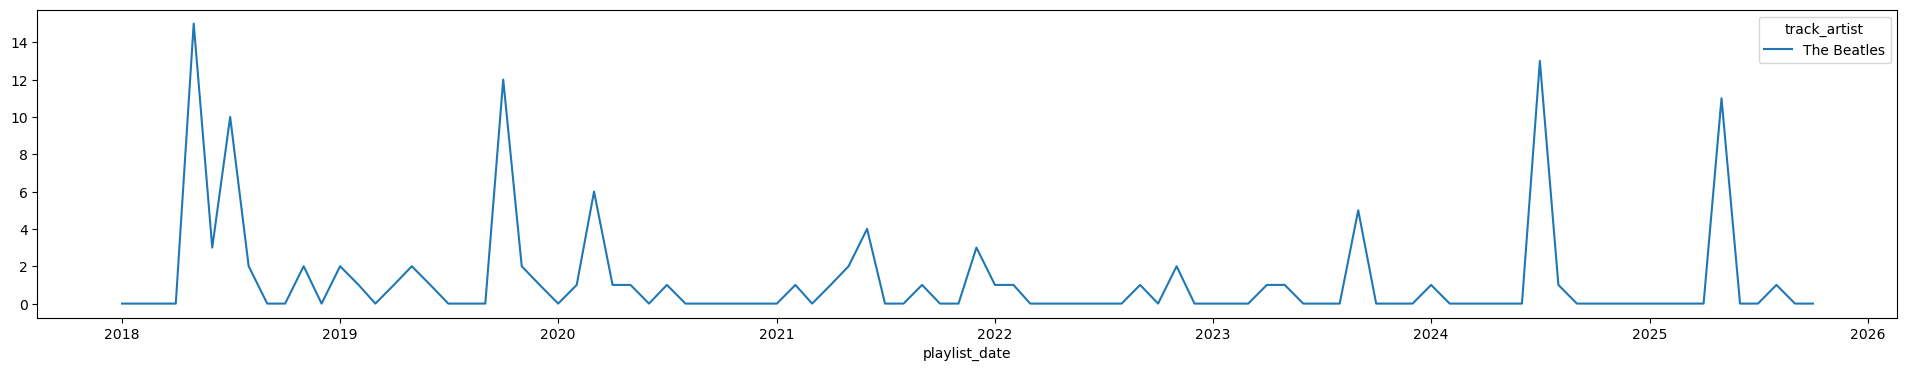

In [32]:
n_top = 1
df_top = df[mpl.artist_counts[:n_top].index.to_list()]# + ['year', 'month']]
fig, ax = plt.subplots(figsize = (24,4))
#df_top.groupby(lambda x: x.year).agg(sum).plot(ax=ax)
df_top.plot(ax=ax)

In [16]:
mpl.df_tracks.groupby('playlist_id')['track_artist'].value_counts().reset_index()#.pivot(
            #columns = 'track_artist', index = 'playlist_id',values = 'count'
       # ).fillna(0)

playlist_id        track_artist  count
0     07LBtZR9Svegjy8Vi51CTj           JPEGMAFIA      6
1     07LBtZR9Svegjy8Vi51CTj          Kanye West      6
2     07LBtZR9Svegjy8Vi51CTj         Danny Brown      5
3     07LBtZR9Svegjy8Vi51CTj          Black Star      4
4     07LBtZR9Svegjy8Vi51CTj  Masayoshi Takanaka      4
...                      ...                 ...    ...
4335  7wRcixzy7297A5iy8BiuaU            Kiko Bun      1
4336  7wRcixzy7297A5iy8BiuaU         Little Simz      1
4337  7wRcixzy7297A5iy8BiuaU        Paolo Nutini      1
4338  7wRcixzy7297A5iy8BiuaU         Tammy Lucas      1
4339  7wRcixzy7297A5iy8BiuaU           Tom Misch      1

[4340 rows x 3 columns]

### Genres

In [15]:
mpl.df_tracks

track_names              track_artist  \
0     Goodums - Sammy Virji Remix                 Unknown T   
1     Goodums - Sammy Virji Remix               Sammy Virji   
2           Send My Love to Linda              Jimi Hendrix   
3                        No Merci               Little Simz   
4                 Stunt Like This              Young Franco   
...                           ...                       ...   
6967                    Two Words                   Mos Def   
6968                    Two Words                   Freeway   
6969                    Two Words  The Boys Choir Of Harlem   
6970            Lie, Cheat, Steal            Run The Jewels   
6971           Look Mama I Did It            Injury Reserve   

              track_date_added             playlist_id playlist_name  \
0    2025-10-02 15:55:52+00:00  1ZuOGhyyL9u6nZMkrPOaXi  October 2025   
1    2025-10-02 15:55:52+00:00  1ZuOGhyyL9u6nZMkrPOaXi  October 2025   
2    2025-10-02 15:56:35+00:00  1ZuOGhyyL9u6nZMkrPOaXi  October 2025   
3    2025-10-02 15:56:46+00:00  1ZuOGhyyL9u6nZMkrPOaXi  October 2025   
4    2025-10-02 17:24:02+00:00  1ZuOGhyyL9u6nZMkrPOaXi  October 2025   
...                        ...                     ...           ...   
6967 2018-01-17 18:15:42+00:00  5IG5IXvM6LK8Q7U4Bsb738  january 2018   
6968 2018-01-17 18:15:42+00:00  5IG5IXvM6LK8Q7U4Bsb738  january 2018   
6969 2018-01-17 18:15:42+00:00  5IG5IXvM6LK8Q7U4Bsb738  january 2018   
6970 2018-01-31 17:23:09+00:00  5IG5IXvM6LK8Q7U4Bsb738  january 2018   
6971 2018-01-31 17:27:12+00:00  5IG5IXvM6LK8Q7U4Bsb738  january 2018   

      track_index  track_artists_index       track_artist_spid  \
0               1                    1  3iAhNz3e31lBuXYOsqGsf3   
1               1                    2  1GuqTQbuixFHD6eBkFwVcb   
2               2                    1  776Uo845nYHJpNaStv1Ds4   
3               3                    1  6eXZu6O7nAUA5z6vLV8NKI   
4               4                    1  6mK0vAO13gT8jWYANyoXAl   
...           ...                  ...                     ...   
6967           16                    2  0Mz5XE0kb1GBnbLQm2VbcO   
6968           16                    3  2Jwr7hGoSNK3S3QBxh3T0z   
6969           16                    4  7Cp14KBRtDwGucKNPUyT11   
6970           17                    1  4RnBFZRiMLRyZy0AzzTg2C   
6971           18                    1  3nf2EaHj8HikLNdaiW3v73   

                         track_album track_release_date  \
0        Goodums (Sammy Virji Remix)         2023-10-20   
1        Goodums (Sammy Virji Remix)         2023-10-20   
2              Both Sides of the Sky         2018-03-09   
3                       NO THANK YOU         2022-12-12   
4                    Stunt Like This         2024-10-10   
...                              ...                ...   
6967  The College Dropout (Explicit)         2004-01-01   
6968  The College Dropout (Explicit)         2004-01-01   
6969  The College Dropout (Explicit)         2004-01-01   
6970                Run the Jewels 2         2014-10-24   
6971                           Floss         2016-12-15   

     track_release_date_precision  track_duration  track_popularities  \
0                             day          184364                  56   
1                             day          184364                  56   
2                             day          276786                  31   
3                             day          317278                  46   
4                             day          166774                  31   
...                           ...             ...                 ...   
6967                          day          266213                   0   
6968                          day          266213                   0   
6969                          day          266213                   0   
6970                          day          208466                   0   
6971                          day          269448                  21   

            track_ext

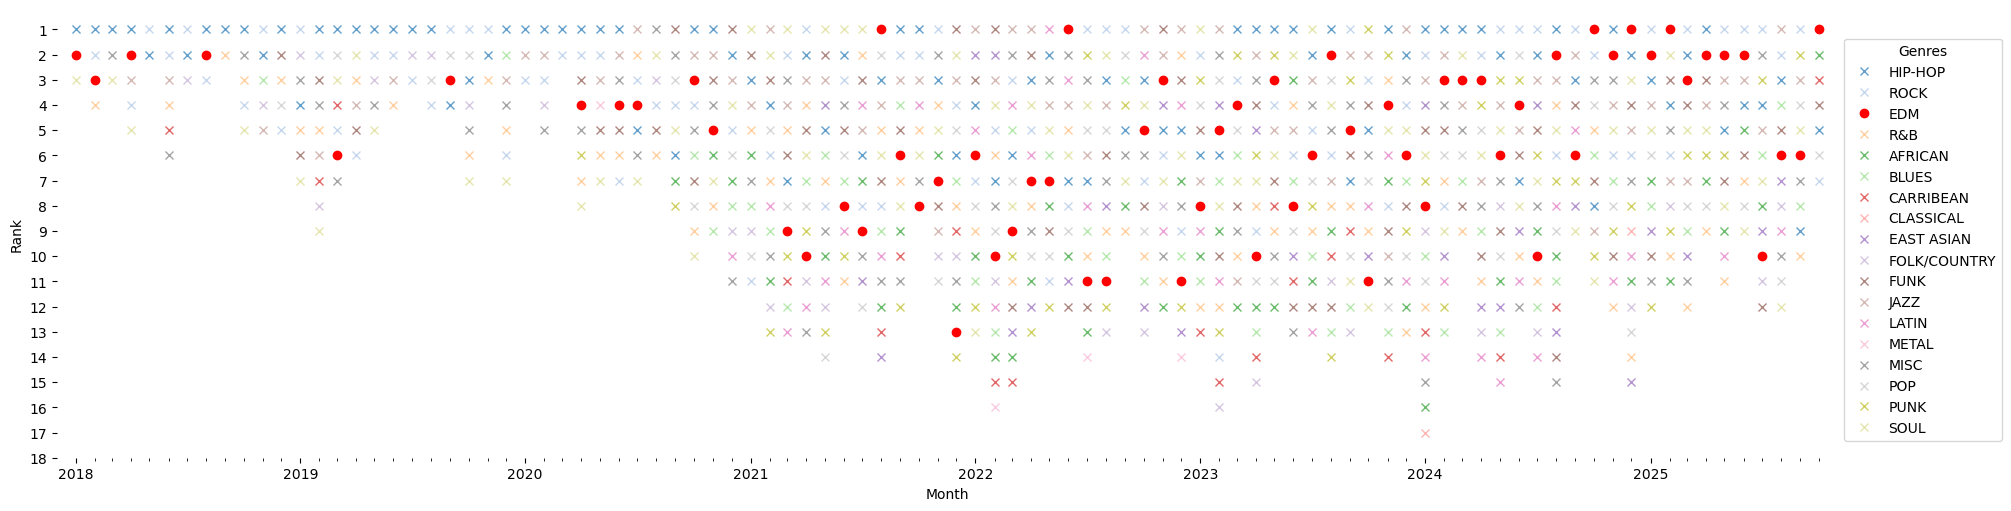

In [ ]:
mpl.plot_supergenres(highlight = 'EDM')

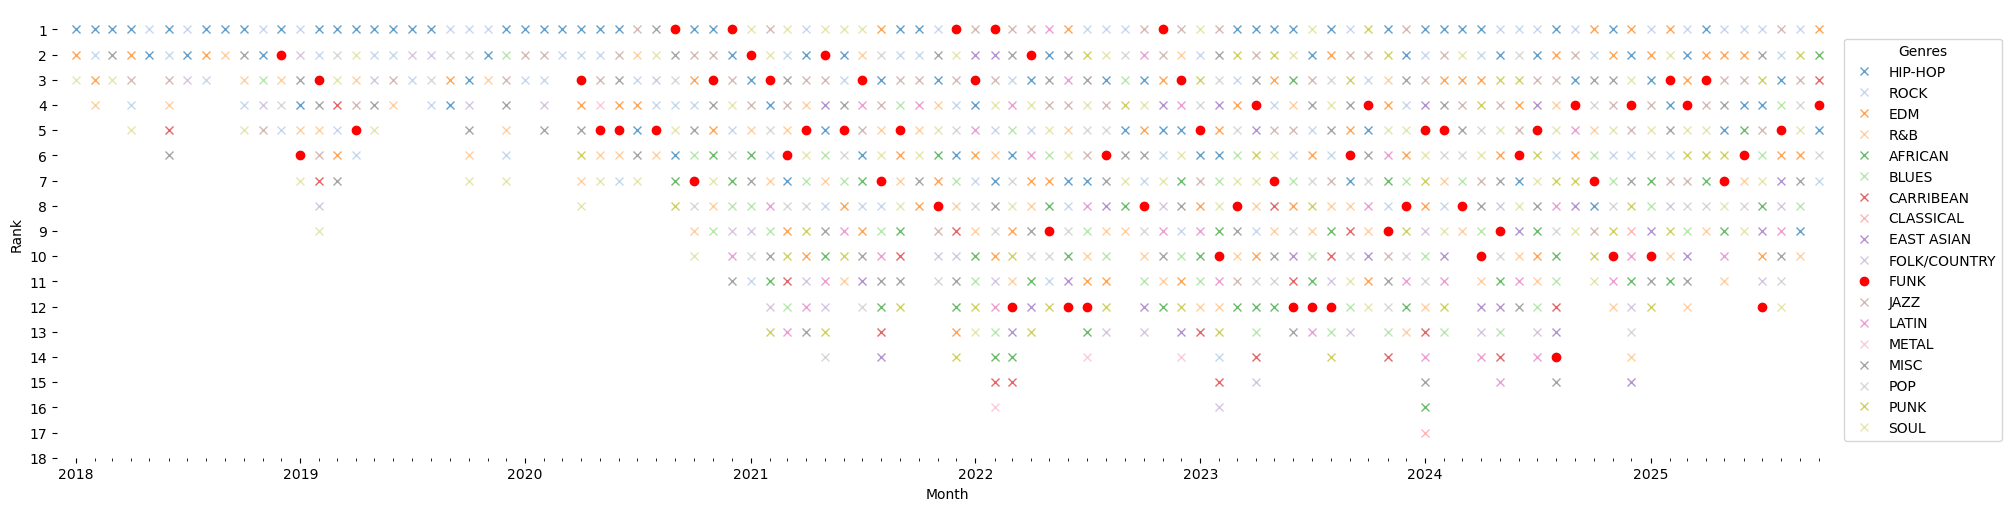

In [ ]:
def df_tracks_flattened(self = mpl):
    track_cols = [  # excluding columns that specify artists in the aggregation
        'track_names',  
        'track_date_added',
        'playlist_id',
        'playlist_name',
        'track_index',
        'track_album',
        'track_release_date',
        'track_release_date_precision',
        'track_duration',
        'track_popularities',
        'track_external_ids',
        'track_spid'
    ]

    df_tracks = self.df_tracks
    df_tracks['track_artist_genres'] = df_tracks['track_artist_genres'].apply(lambda x: eval(x) if isinstance(x, str) else x)

    df_tracks = df_tracks.groupby(track_cols).agg({
        'track_artist_genres' : lambda x: list(set(x.sum())),
        'track_artist': lambda x: x.to_list(),
        'track_artist_spid' : lambda x: x.to_list(),
        'track_artist_popularity' : lambda x: x.to_list(),
    }).sort_index(
        level = 'track_date_added', 
        ascending=False
    ).reset_index()
    
    return df_tracks

def plot_genres(self = mpl, aggregate_genres = True, highlight = 'funk', 
                xaxis_pad = pd.Timedelta('30D')):
    

    ################################################## FLATTEN ARTIST GENRES ##################################################

    track_cols = [  # excluding columns that specify artists in the aggregation
        'track_names',  
        'track_date_added',
        'playlist_id',
        'playlist_name',
        'track_index',
        'track_album',
        'track_release_date',
        'track_release_date_precision',
        'track_duration',
        'track_popularities',
        'track_external_ids',
        'track_spid'
    ]

    df_tracks = self.df_tracks
    df_tracks['track_artist_genres'] = df_tracks['track_artist_genres'].apply(lambda x: eval(x) if isinstance(x, str) else x)

    df_tracks = df_tracks.groupby(track_cols).agg({
        'track_artist_genres' : lambda x: list(set(x.sum())),
        'track_artist': lambda x: x.to_list(),
        'track_artist_spid' : lambda x: x.to_list(),
        'track_artist_popularity' : lambda x: x.to_list(),
    }).sort_index(
        level = 'track_date_added', 
        ascending=False
    ).reset_index()


    ###################################################### ONE HOT ENCODE ######################################################    
    if aggregate_genres:
        genres = sorted(list(self.supergenre_lists.keys()))
        agg_fn = lambda x: genre in [self.supergenre_map[i] for i in x]
    else:
        genres = sorted(self.genres)
        agg_fn = lambda x: genre in x

    cols = []
    for genre in genres:
        ser = df_tracks['track_artist_genres'].apply(agg_fn)
        ser.name = genre
        cols.append(ser)
        
    df_tracks = pd.concat([df_tracks, pd.concat(cols, axis = 1)], axis = 1)


    ######################################################## SUM BY MONTH ########################################################    

    # genre sums in each playlist
    df_genres = df_tracks.groupby('playlist_id')[genres].agg(lambda x: sum(x))  # /len(x))  # no percentages!
    df_genres.index = df_genres.index.map(self.ids_to_dates).set_names('playlist_date')
    df_genres.sort_index(inplace=True)

    ############################################### CALCULATE RANKS IN EACH MONTH ###############################################    
    df_rank = df_genres.replace(0, pd.NA).rank(
        ascending=False, 
        method = 'first', 
        na_option='keep',
        axis = 1
    ).sort_values(
        axis = 1, 
        by = df_genres.index.values[1],
        ascending=True
    )
    
    ########################################################### PLOT ###########################################################    
    fig, ax = plt.subplots(figsize = (20,5))
    cmap = matplotlib.colormaps.get_cmap('tab20')

    for i, col in enumerate(df_rank):
        if col == highlight.upper():
            ax.plot(
                df_rank[col], 
                color = 'r', 
                label = col,
                linestyle = 'None', 
                marker = 'o',
            )
        else:
            ax.plot(
                df_rank[col], 
                color = cmap(i), 
                label = col, 
                alpha = 0.7,
                linestyle = 'None', 
                marker = 'x'
            )

    ax.set_yticks(range(1,19))


    ax.set_xlim(df_genres.index.min() - xaxis_pad, df_genres.index.max() + xaxis_pad)
    ax.invert_yaxis()
    ax.legend(bbox_to_anchor = (1, 0.95), title = 'Genres')
    #ax.set_title('Genre ranking timeseries')
    ax.set_xlabel('Month')
    ax.set_ylabel('Rank')
    fig.set_constrained_layout(True)

    # set axis box off
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator())
    #ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter('%m'))

    plt.show()

plot_genres()


In [3]:
df_tracks = mpl.df_tracks
cols = []
for genre in sorted(mpl.genres):
    ser = df_tracks['track_artist_genres'].apply(lambda x: genre in x)
    ser.name = genre
    cols.append(ser)
    
cols = pd.concat(cols, axis = 1)
df_tracks = pd.concat([df_tracks, cols], axis = 1)
df_tracks

track_names              track_artist  \
0     Goodums - Sammy Virji Remix                 Unknown T   
1     Goodums - Sammy Virji Remix               Sammy Virji   
2           Send My Love to Linda              Jimi Hendrix   
3                        No Merci               Little Simz   
4                 Stunt Like This              Young Franco   
...                           ...                       ...   
6967                    Two Words                   Mos Def   
6968                    Two Words                   Freeway   
6969                    Two Words  The Boys Choir Of Harlem   
6970            Lie, Cheat, Steal            Run The Jewels   
6971           Look Mama I Did It            Injury Reserve   

              track_date_added             playlist_id playlist_name  \
0    2025-10-02 15:55:52+00:00  1ZuOGhyyL9u6nZMkrPOaXi  October 2025   
1    2025-10-02 15:55:52+00:00  1ZuOGhyyL9u6nZMkrPOaXi  October 2025   
2    2025-10-02 15:56:35+00:00  1ZuOGhyyL9u6nZMkrPOaXi  October 2025   
3    2025-10-02 15:56:46+00:00  1ZuOGhyyL9u6nZMkrPOaXi  October 2025   
4    2025-10-02 17:24:02+00:00  1ZuOGhyyL9u6nZMkrPOaXi  October 2025   
...                        ...                     ...           ...   
6967 2018-01-17 18:15:42+00:00  5IG5IXvM6LK8Q7U4Bsb738  january 2018   
6968 2018-01-17 18:15:42+00:00  5IG5IXvM6LK8Q7U4Bsb738  january 2018   
6969 2018-01-17 18:15:42+00:00  5IG5IXvM6LK8Q7U4Bsb738  january 2018   
6970 2018-01-31 17:23:09+00:00  5IG5IXvM6LK8Q7U4Bsb738  january 2018   
6971 2018-01-31 17:27:12+00:00  5IG5IXvM6LK8Q7U4Bsb738  january 2018   

      track_index  track_artists_index       track_artist_spid  \
0               1                    1  3iAhNz3e31lBuXYOsqGsf3   
1               1                    2  1GuqTQbuixFHD6eBkFwVcb   
2               2                    1  776Uo845nYHJpNaStv1Ds4   
3               3                    1  6eXZu6O7nAUA5z6vLV8NKI   
4               4                    1  6mK0vAO13gT8jWYANyoXAl   
...           ...                  ...                     ...   
6967           16                    2  0Mz5XE0kb1GBnbLQm2VbcO   
6968           16                    3  2Jwr7hGoSNK3S3QBxh3T0z   
6969           16                    4  7Cp14KBRtDwGucKNPUyT11   
6970           17                    1  4RnBFZRiMLRyZy0AzzTg2C   
6971           18                    1  3nf2EaHj8HikLNdaiW3v73   

                         track_album track_release_date  ... uk r&b  \
0        Goodums (Sammy Virji Remix)         2023-10-20  ...  False   
1        Goodums (Sammy Virji Remix)         2023-10-20  ...  False   
2              Both Sides of the Sky         2018-03-09  ...  False   
3                       NO THANK YOU         2022-12-12  ...  False   
4                    Stunt Like This         2024-10-10  ...  False   
...                              ...                ...  ...    ...   
6967  The College Dropout (Explicit)         2004-01-01  ...  False   
6968  The College Dropout (Explicit)         2004-01-01  ...  False   
6969  The College Dropout (Explicit)         2004-01-01  ...  False   
6970                Run the Jewels 2         2014-10-24  ...  False   
6971                           Floss         2016-12-15  ...  False   

      underground hip hop  vaporwave variété française villancicos vocal jazz  \
0                   False      False             False       False      False   
1                   False      False             False       False      False   
2                   False      False             False       False      False   
3                   False      False             False       False      False   
4                   False      False             False       False      False   
...                   ...        ...               ...         ...        ...   
6967                False      False             False       False      False   
6968                False      False             False       False      False   
6969                False

In [6]:
genres = sorted(mpl.genres)
df_genres = df_tracks.groupby('playlist_id')[genres].agg(lambda x: sum(x))  # /len(x))
df_genres.index = df_genres.index.map(mpl.ids_to_dates).set_names('playlist_date')
df_genres.sort_index(inplace=True)
df_genres

acid house  acid jazz  acid rock  adult standards  afro adura  \
playlist_date                                                                  
2018-01-01              0          0          0                0           0   
2018-02-01              0          0          4                0           0   
2018-03-01              0          0          0                0           0   
2018-04-01              0          1          0                0           0   
2018-05-01              0          0          0                0           0   
...                   ...        ...        ...              ...         ...   
2025-06-01              0          0         12                0           0   
2025-07-01              0          0          1                0           0   
2025-08-01              0          0          0                0           0   
2025-09-01              0          0          1                0           0   
2025-10-01              0          0          1                0           0   

               afro house  afro r&b  afro soul  afro tech  afrobeat  ...  \
playlist_date                                                        ...   
2018-01-01              0         0          0          0         0  ...   
2018-02-01              0         0          0          0         0  ...   
2018-03-01              0         0          0          0         0  ...   
2018-04-01              0         0          0          0         0  ...   
2018-05-01              0         0          0          0         0  ...   
...                   ...       ...        ...        ...       ...  ...   
2025-06-01              0         0          0          0         0  ...   
2025-07-01              0         0          0          0         0  ...   
2025-08-01              0         0          0          0         0  ...   
2025-09-01              0         0          0          0         0  ...   
2025-10-01              0         0          0          0         0  ...   

               uk r&b  underground hip hop  vaporwave  variété française  \
playlist_date                                                              
2018-01-01          0                    0          0                  0   
2018-02-01          0                    2          0                  0   
2018-03-01          0                    8          0                  0   
2018-04-01          0                    8          0                  0   
2018-05-01          0                    2          0                  0   
...               ...                  ...        ...                ...   
2025-06-01          1                    0          0                  0   
2025-07-01          0                    0          0                  0   
2025-08-01          0                    0          0                  0   
2025-09-01          1                    0          0                  0   
2025-10-01          0                    0          0                  0   

               villancicos  vocal jazz  west coast hip hop  worship  \
playlist_date                                                         
2018-01-01               0           0                   1        0   
2018-02-01               0           0                   4        0   
2018-03-01               0           0                   8        0   
2018-04-01               0           0                   2        0   
2018-05-01               0           0                   0        0   
...                    ...         ...                 ...      ...   
2025-06-01               0           0                   0        0   
2025-07-01               0           0                   0        0   
2025-08-01               0           0                   0        0   
2025-09-01               0           1                   0        0   
2025-10-01               0           0                   0        0   

               yacht rock  zydeco  
playlist_date                      


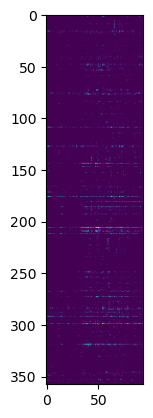

In [14]:
fig, ax = plt.subplots()
ax.imshow(df_genres.sort_index().T.values)

In [ ]:
gtcs = mpl.genre_track_counts()
gtcs.sort_values(inplace=True, ascending=False)
gtcs

jazz               138
rock               127
funk               127
pop                123
jazz fusion        122
                  ... 
ranchera             1
classic country      1
glam metal           1
raï                  1
ambient folk         1
Length: 358, dtype: int64

<Axes: xlabel='playlist_date'>

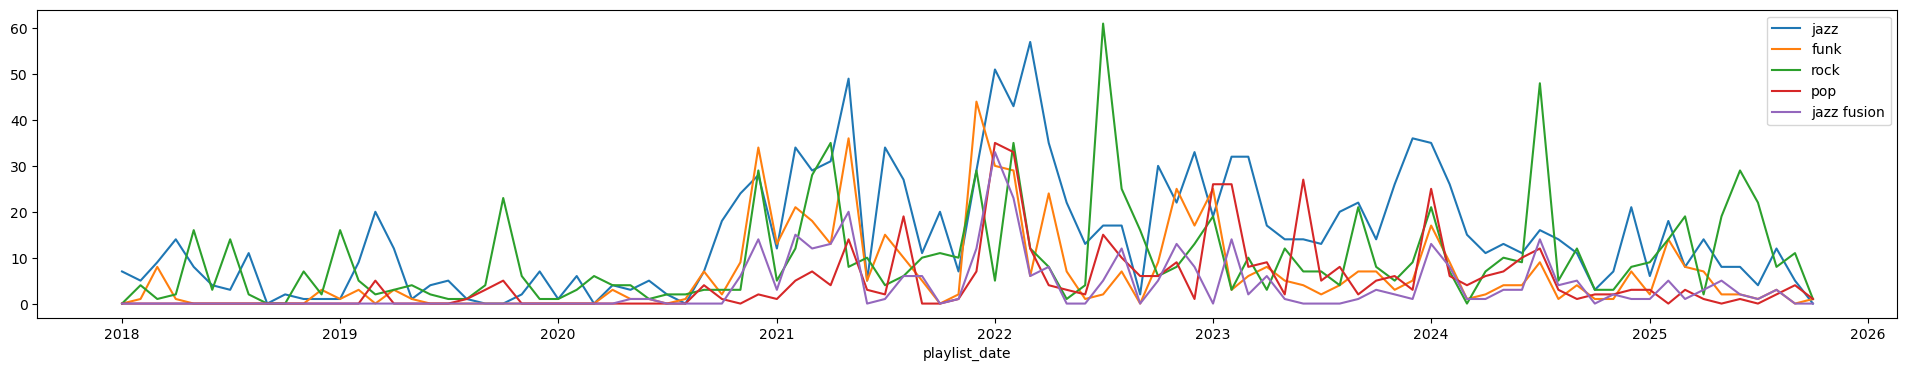

In [ ]:
n_top = 5
df_top = df_genres[gtcs[:n_top].index.to_list()]# + ['year', 'month']]
fig, ax = plt.subplots(figsize = (24,4))

df_top.plot(ax=ax)
ax.set_title(f'Number of tracks of each genre')

In [97]:
df_tracks['track_artist_genres'] = df_tracks['track_artist_genres'].apply(lambda x: eval(x) if isinstance(x, str) else x)
df_tracks.groupby(by = ['track_spid'])['track_artist_genres'].apply(lambda x: list(set(x.sum())))

track_spid
00iZlOpfLr21eTSl0Ba3hn                       [jazz funk, jazz fusion, funk]
00oQQmRQTVONwfEnoSxG97                                                   []
01CuCSqlNItevX7F1GcopF    [east coast hip hop, old school hip hop, hip hop]
01E4LxSBkicxbOlPQKu98Z                                               [punk]
01SfTM5nfCou5gQL70r6gs                     [psychedelic rock, classic rock]
                                                ...                        
7zaCNVeN3srfUDPPN23xDw                                                   []
7zpm7lTY2EZn7AfFm3mGg2                                 [disco, philly soul]
7zq1YbMIklTQ3GZWG6ICg1                       [jazz funk, jazz fusion, funk]
7zscdQe9CjzXnqT3P1Ey7K       [rock, rock and roll, classic rock, hard rock]
7zvfDihYiJ8RQ1nRcpKBF5                        [hip hop, west coast hip hop]
Name: track_artist_genres, Length: 4222, dtype: object

In [ ]:
track_cols = ['track_names',  # excluding columns that specify artists
 'track_date_added',
 'playlist_id',
 'playlist_name',
 'track_index',
 'track_album',
 'track_release_date',
 'track_release_date_precision',
 'track_duration',
 'track_popularities',
 'track_external_ids',
 'track_spid'
]

df_tracks.groupby(track_cols)['track_artist_genres'].apply(lambda x: list(set(x.sum()))  ).reset_index().sort_values(['track_date_added'], ascending=False)

track_names          track_date_added  \
3643                           Scream & Shout 2025-10-02 17:31:37+00:00   
1665                 Give Thanks, Give Praise 2025-10-02 17:27:57+00:00   
3967                          Stunt Like This 2025-10-02 17:24:02+00:00   
3018                                 No Merci 2025-10-02 15:56:46+00:00   
3671                    Send My Love to Linda 2025-10-02 15:56:35+00:00   
...                                       ...                       ...   
92                                        745 2018-01-04 19:51:18+00:00   
4902                               Yeah Right 2018-01-04 19:51:15+00:00   
1951                                   Homage 2018-01-04 19:51:11+00:00   
3426  Rapp Snitch Knishes feat. Mr. Fantastik 2018-01-04 19:51:08+00:00   
4754     What's Goodie (feat. Cakes da Killa) 2018-01-04 19:51:04+00:00   

                 playlist_id playlist_name  track_index  \
3643  1ZuOGhyyL9u6nZMkrPOaXi  October 2025            6   
1665  1ZuOGhyyL9u6nZMkrPOaXi  October 2025            5   
3967  1ZuOGhyyL9u6nZMkrPOaXi  October 2025            4   
3018  1ZuOGhyyL9u6nZMkrPOaXi  October 2025            3   
3671  1ZuOGhyyL9u6nZMkrPOaXi  October 2025            2   
...                      ...           ...          ...   
92    5IG5IXvM6LK8Q7U4Bsb738  january 2018            5   
4902  5IG5IXvM6LK8Q7U4Bsb738  january 2018            4   
1951  5IG5IXvM6LK8Q7U4Bsb738  january 2018            3   
3426  5IG5IXvM6LK8Q7U4Bsb738  january 2018            2   
4754  5IG5IXvM6LK8Q7U4Bsb738  january 2018            1   

                track_album track_release_date track_release_date_precision  \
3643             #willpower         2013-01-01                          day   
1665      it's Franky baby!         2025-01-24                          day   
3967        Stunt Like This         2024-10-10                          day   
3018           NO THANK YOU         2022-12-12                          day   
3671  Both Sides of the Sky         2018-03-09                          day   
...                     ...                ...                          ...   
92          Big Fish Theory         2017-06-23                          day   
4902        Big Fish Theory         2017-06-23                          day   
1951        Big Fish Theory         2017-06-23                          day   
3426              MM...FOOD         2004-01-01                         year   
4754                  Floss         2016-12-15                          day   

      track_duration  track_popularities        track_external_ids  \
3643          283400                  79  {'isrc': 'USUM71215597'}   
1665          221602                  52  {'isrc': 'AUNE32400021'}   
3967          166774                  31  {'isrc': 'AUNE32400017'}   
3018          317278                  46  {'isrc': 'QMFME2257576'}   
3671          276786                  31  {'isrc': 'USQX91702594'}   
...              ...                 ...                       ...   
92            227560                   0  {'isrc': 'USUM71705067'}   
4902          188946                   0  {'isrc': 'USUM71705069'}   
1951          173040                   0  {'isrc': 'USUM71705070'}   
3426          172893                   0  {'isrc': 'USBWK0700049'}   
4754          174314                  30  {'isrc': 'TCACU1608291'}   

                  track_spid  \
3643  2iJuuzV8P9Yz0VSurttIV5   
1665  3iNAdtlehRYGgYV6rt07IM   
3967  32cWu1hGQ3SgFPqEe2xVyl   
3018  552lBxKLGjerBDS8VYHOJn   
3671  2bE5QqVc9q4w5ETEKAazQr   
...                      ...   
92    3gUjbNhaMq2Zjbcc1tPvMw   
4902  5ZrDbBB4UhYMsPA3xRKOzV   
1951  3PRsTO7mYcqK8vRdgunW1J   
3426  25kGNSv0yGXZKaC79xzrvg   
4754  3BhSiKrzvrROupHmoxq12R   

                                    track_artist_genres  
3643                                              [pop]  
1665  [rally house, ragga, drum and bass, uk garage,...  
3967                                                 []  
3018             

In [276]:
# flatten artists
df_tracks_fa = df_tracks.groupby(track_cols).agg({
    'track_artist_genres' : lambda x: list(set(x.sum())),
    'track_artist': lambda x: x.to_list(),
    'track_artist_spid' : lambda x: x.to_list(),
    'track_artist_popularity' : lambda x: x.to_list(),
}).sort_index(level = 'track_date_added', ascending=False).reset_index().rename(columns={
    'track_names' : 'track_name',
    'track_date_added' : 'date_added',
    'track_release_date' : 'release_date',
    'track_release_date_precision' : 'release_date_precision',
    'track_duration' : 'duration_ms',
    'track_popularities' : 'popularity',
    'track_external_ids' : 'external_ids',
    'track_artist' : 'artists',
    'track_artist_spid' : 'artists_spids',
    'track_artist_popularity' : 'artists_popularities'
})
df_tracks_fa

track_name                date_added  \
0                              Scream & Shout 2025-10-02 17:31:37+00:00   
1                    Give Thanks, Give Praise 2025-10-02 17:27:57+00:00   
2                             Stunt Like This 2025-10-02 17:24:02+00:00   
3                                    No Merci 2025-10-02 15:56:46+00:00   
4                       Send My Love to Linda 2025-10-02 15:56:35+00:00   
...                                       ...                       ...   
5199                                      745 2018-01-04 19:51:18+00:00   
5200                               Yeah Right 2018-01-04 19:51:15+00:00   
5201                                   Homage 2018-01-04 19:51:11+00:00   
5202  Rapp Snitch Knishes feat. Mr. Fantastik 2018-01-04 19:51:08+00:00   
5203     What's Goodie (feat. Cakes da Killa) 2018-01-04 19:51:04+00:00   

                 playlist_id playlist_name  track_index  \
0     1ZuOGhyyL9u6nZMkrPOaXi  October 2025            6   
1     1ZuOGhyyL9u6nZMkrPOaXi  October 2025            5   
2     1ZuOGhyyL9u6nZMkrPOaXi  October 2025            4   
3     1ZuOGhyyL9u6nZMkrPOaXi  October 2025            3   
4     1ZuOGhyyL9u6nZMkrPOaXi  October 2025            2   
...                      ...           ...          ...   
5199  5IG5IXvM6LK8Q7U4Bsb738  january 2018            5   
5200  5IG5IXvM6LK8Q7U4Bsb738  january 2018            4   
5201  5IG5IXvM6LK8Q7U4Bsb738  january 2018            3   
5202  5IG5IXvM6LK8Q7U4Bsb738  january 2018            2   
5203  5IG5IXvM6LK8Q7U4Bsb738  january 2018            1   

                track_album release_date release_date_precision  duration_ms  \
0                #willpower   2013-01-01                    day       283400   
1         it's Franky baby!   2025-01-24                    day       221602   
2           Stunt Like This   2024-10-10                    day       166774   
3              NO THANK YOU   2022-12-12                    day       317278   
4     Both Sides of the Sky   2018-03-09                    day       276786   
...                     ...          ...                    ...          ...   
5199        Big Fish Theory   2017-06-23                    day       227560   
5200        Big Fish Theory   2017-06-23                    day       188946   
5201        Big Fish Theory   2017-06-23                    day       173040   
5202              MM...FOOD   2004-01-01                   year       172893   
5203                  Floss   2016-12-15                    day       174314   

      popularity              external_ids              track_spid  \
0             79  {'isrc': 'USUM71215597'}  2iJuuzV8P9Yz0VSurttIV5   
1             52  {'isrc': 'AUNE32400021'}  3iNAdtlehRYGgYV6rt07IM   
2             31  {'isrc': 'AUNE32400017'}  32cWu1hGQ3SgFPqEe2xVyl   
3             46  {'isrc': 'QMFME2257576'}  552lBxKLGjerBDS8VYHOJn   
4             31  {'isrc': 'USQX91702594'}  2bE5QqVc9q4w5ETEKAazQr   
...          ...                       ...                     ...   
5199           0  {'isrc': 'USUM71705067'}  3gUjbNhaMq2Zjbcc1tPvMw   
5200           0  {'isrc': 'USUM71705069'}  5ZrDbBB4UhYMsPA3xRKOzV   
5201           0  {'isrc': 'USUM71705070'}  3PRsTO7mYcqK8vRdgunW1J   
5202           0  {'isrc': 'USBWK0700049'}  25kGNSv0yGXZKaC79xzrvg   
5203          30  {'isrc': 'TCACU1608291'}  3BhSiKrzvrROupHmoxq12R   

                                    track_artist_genres  \
0                                                 [pop]   
1     [rally house, ragga, drum and bass, uk garage,...   
2                                                    []   
3                                                    []   
4     [acid rock, psychedelic rock, blues rock, clas...   
...                                                 ...   
5199                                                 []   
5200                                                 []   
5201                                                 []   
5202  [experimental hip hop, east

In [149]:
genres = sorted(mpl.genres)

cols = []
for genre in genres:
    ser = df_tracks_fa['track_artist_genres'].apply(lambda x: genre in x)
    ser.name = genre
    cols.append(ser)
    
cols = pd.concat(cols, axis = 1)
df_tracks_fa = pd.concat([df_tracks_fa, cols], axis = 1)


df = df_tracks_fa.groupby('playlist_id')[genres].agg(lambda x: sum(x)/len(x))
df.index = df.index.map(mpl.ids_to_dates).set_names('playlist_date')
df.sort_index(inplace=True)
df

acid house  acid jazz  acid rock  adult standards  afro adura  \
playlist_date                                                                  
2018-01-01            0.0   0.000000   0.000000              0.0         0.0   
2018-02-01            0.0   0.000000   0.105263              0.0         0.0   
2018-03-01            0.0   0.000000   0.000000              0.0         0.0   
2018-04-01            0.0   0.027027   0.000000              0.0         0.0   
2018-05-01            0.0   0.000000   0.000000              0.0         0.0   
...                   ...        ...        ...              ...         ...   
2025-06-01            0.0   0.000000   0.184615              0.0         0.0   
2025-07-01            0.0   0.000000   0.019608              0.0         0.0   
2025-08-01            0.0   0.000000   0.000000              0.0         0.0   
2025-09-01            0.0   0.000000   0.027778              0.0         0.0   
2025-10-01            0.0   0.000000   0.166667              0.0         0.0   

               afro house  afro r&b  afro soul  afro tech  afrobeat  ...  \
playlist_date                                                        ...   
2018-01-01            0.0       0.0        0.0        0.0       0.0  ...   
2018-02-01            0.0       0.0        0.0        0.0       0.0  ...   
2018-03-01            0.0       0.0        0.0        0.0       0.0  ...   
2018-04-01            0.0       0.0        0.0        0.0       0.0  ...   
2018-05-01            0.0       0.0        0.0        0.0       0.0  ...   
...                   ...       ...        ...        ...       ...  ...   
2025-06-01            0.0       0.0        0.0        0.0       0.0  ...   
2025-07-01            0.0       0.0        0.0        0.0       0.0  ...   
2025-08-01            0.0       0.0        0.0        0.0       0.0  ...   
2025-09-01            0.0       0.0        0.0        0.0       0.0  ...   
2025-10-01            0.0       0.0        0.0        0.0       0.0  ...   

                 uk r&b  underground hip hop  vaporwave  variété française  \
playlist_date                                                                
2018-01-01     0.000000             0.000000        0.0                0.0   
2018-02-01     0.000000             0.052632        0.0                0.0   
2018-03-01     0.000000             0.210526        0.0                0.0   
2018-04-01     0.000000             0.216216        0.0                0.0   
2018-05-01     0.000000             0.066667        0.0                0.0   
...                 ...                  ...        ...                ...   
2025-06-01     0.015385             0.000000        0.0                0.0   
2025-07-01     0.000000             0.000000        0.0                0.0   
2025-08-01     0.000000             0.000000        0.0                0.0   
2025-09-01     0.027778             0.000000        0.0                0.0   
2025-10-01     0.000000             0.000000        0.0                0.0   

               villancicos  vocal jazz  west coast hip hop  worship  \
playlist_date                                                         
2018-01-01             0.0    0.000000            0.055556      0.0   
2018-02-01             0.0    0.000000            0.105263      0.0   
2018-03-01             0.0    0.000000            0.105263      0.0   
2018-04-01             0.0    0.000000            0.054054      0.0   
2018-05-01             0.0    0.000000            0.000000      0.0   
...                    ...         ...                 ...      ...   
2025-06-01             0.0    0.000000            0.000000      0.0   
2025-07-01             0.0    0.000000            0.000000      0.0   
2025-08-01             0.0    0.000000            0.000000      0.0   
2025-09-01             0.0    0.027778            0.000000      0.0   
2025-10-01             0.0    0.000000            0.000000      0.0   

               yacht rock  zydeco  
playlist_d

In [444]:
genre_subgenre_lists = {
    # EDM//electronic//dance
    'EDM':
    [
        'acid house',
        'alternative dance',
        'afro house', # afrobeats?
        'afro tech',
        'ballroom vogue',
        'baltimore club',
        'bass house',
        'bassline',
        'big beat',
        'breakbeat',
        'breakcore',
        'chicago house',
        'chillstep',
        'dance',
        'dancehall',
        'deep house',
        'disco house',
        'disco', # DISCO - could just be part of above?
        'downtempo',
        'drum and bass',
        'drumstep',
        'dub techno',
        'dubstep',
        'ebm',
        'edm',
        'edm trap',
        'electro',
        'electro swing', # lol
        'electroclash',
        'electronic',
        'electronica',
        'eurodance',
        'footwork',
        'freestyle',
        'french house',
        'funky house',
        'future bass',
        'g-house',
        'glitch',
        'hard house',
        'hard techno',
        'hi-nrg',
        'house',
        'idm', # 'intelligent dance music'. strong candidate for wankiest genre name
        'indie dance',
        'industrial',
        'italo dance',
        'italo disco',
        'jazz house',
        'jersey club',
        'jungle',
        'lo-fi house',
        'minimal techno',
        'moombahton',
        'new rave',
        'nu disco',
        'post-disco',
        'rally house',
        'stutter house',
        'synthwave',
        'tech house',
        'techno',
        'trance',
        'tropical house',
        'uk garage',
    ],

    'JAZZ':
    [
        'acid jazz',
        'bebop',
        'brazilian jazz',
        'cool jazz',
        'ethiopian jazz',
        'free jazz',
        'french jazz',
        'hard bop',
        'indie jazz',
        'jazz',
        'jazz fusion',
        'nu jazz',
        'smooth jazz',
        'swing music',
        'vocal jazz',
    ],

    'ROCK':
    [
        'acid rock',
        'alternative rock',
        'art rock',
        'anatolian rock',
        'aor', # 'album oriented rock'
        'argentine rock',
        'blues rock',
        'brazilian rock',
        'classic rock',
        'country rock',
        'deathrock',
        'folk rock',
        'garage rock',
        'glam rock',
        'gothic rock',
        'hard rock',
        'indie rock',
        'industrial rock',
        'krautrock',
        'lovers rock',
        'madchester',
        'math rock',
        'neo-psychedelic',
        'neue deutsche welle',
        'new wave',  # terribly defined genre. music that links punk and post punk. includes the jam, talking heads, ian dury. rock feels closest
        'noise rock',
        'post-hardcore',
        'post-rock',
        'progressive rock',
        'psychedelic rock',
        'rock',
        'rock and roll',
        'rockabilly',
        'roots rock',
        'slowcore',
        'soft rock',
        'southern rock',
        'space rock',
        'stoner rock',
        'surf rock',
        'yacht rock',
    ],

    'MISC':
    [
        'adult standards',
        'ambient',
        'avant-garde',
        'big band',
        'celtic', # better place for this? only really affects one song so not a huge deal
        'chanson',  # french lyric-driven
        'christmas', # lol
        'comedy',
        'easy listening',
        'exotica',  # ??
        'experimental',
        'german indie',
        'hardcore',  # too poorly defined to be useful. includes hardcore punk, hiphop, and the specific subgenre of edm that just goes by hardcore
        'indian indie',
        'indie',
        'italian singer-songwriter',
        'jam band',
        'japanese indie',
        'lo-fi indie',
        'lounge',
        'maluku',  # catch all for indonesian music (specifically from maluku islands)
        'musicals',
        'singer-songwriter',
        'soundtrack',
        'spoken word',
        'vaporwave', # idk where else to put this
        'variété française',
        'worship',
    ],

    'AFRICAN':
    [
        'afro adura',
        'afrobeat',
        'afrobeats',
        'afropiano',
        'afropop',
        'afroswing',
        'alté',
        'amapiano',
        'asakaa',  # ghanaian drill? in my playlists it only appears on one boj song, due to a feature
        'azonto', # ghanaian dance/hiphop. 
        'bikutsi',
        'hiplife',  # ghanaian (hiphop/ghanaian highlife apparently)
        'gnawa', # morrocan religious songs
        'highlife',
        'raï',  # algerian
        'rumba congolaise',  # rep. congo/drc dance
    ],

    'FOLK/COUNTRY':
    [   
        # COUNTRY
        'alt country',
        'classic country',
        # FOLK
        'anti-folk',
        'ambient folk',
        'americana', # i guess??
        'bluegrass',
        'folk',
        'newgrass',
        'traditional folk',
    ],

    'SOUL':
    [
        'afro soul',
        'cajun',  # not really but i have to put it somewhere
        'classic soul',
        'gospel',  # lol yes ok
        'indie soul',
        'motown',
        'northern soul',
        'philly soul',
        'retro soul',
        'soul',
        'soul blues',
        'soul jazz',
        'southern gospel',
    ],
    'BLUES':
    [
        'blues',
        'boogie-woogie',
        'zydeco',
        'classic blues',
        'country blues',
        'doo-wop',
        'jazz blues',
        'modern blues',
    ],

    'HIP-HOP':
    [
        'alternative hip hop',
        'aussie drill',
        'boom bap',
        'chinese hip hop',
        'cloud rap',
        'crunk',
        'drill',
        'east coast hip hop',
        'emo rap',
        'experimental hip hop',
        'french rap',
        'g-funk',
        'gangster rap',
        'german hip hop',
        'ghanaian hip hop',
        'grime',
        'hardcore hip hop',
        'hip hop',
        'hip house',
        'horrorcore',
        'hyphy',
        'jazz beats',
        'jazz rap',
        'lo-fi', # need to check this one TODO
        'lo-fi beats',
        'lo-fi hip hop',
        'melodic rap',
        'mexican hip hop',
        'miami bass',
        'midwest emo',
        'new orleans bounce',
        'nigerian drill',
        'old school hip hop',
        'rap',
        'rap rock',
        'sexy drill',
        'southern hip hop',
        'trap soul',
        'trip hop',
        'uk drill',
        'uk grime',
        'underground hip hop',
        'west coast hip hop',
    ],

    'R&B':
    [
        'afro r&b',
        'alternative r&b',
        'contemporary r&b',
        'dark r&b',
        'french r&b',
        'gospel r&b',
        'indie r&b',
        'neo soul',
        'quiet storm',
        'r&b',
        'uk r&b',
    ],

    'POP':
    [
        'art pop',
        'baroque pop',
        'bedroom pop',
        'brazilian pop',
        'britpop',
        'chillwave', # loose genre idk
        'dream pop',
        'electropop',
        'flamenco pop',
        'french indie pop',
        'french pop',
        'german indie pop',
        'german pop',
        'hyperpop',
        'indie pop',
        'jangle pop',
        'nederpop', # dutch pop
        'new jack swing',
        'pop',
        'pop soul',
        'pop urbaine',
        'power pop',
        'retro pop',
        'schlager',  # european pop that makes u smile
        'synthpop',
    ],

    'LATIN':
    [
        'axé',
        'bossa nova',
        'bolero', # spanish (rita payes)
        'candombe',  # uruguayan 
        'cha cha cha', # cuban 1950s dance
        'chicha',  # peruvian 60s
        'cumbia', # colombian folk(?). or maybe mexican
        'cumbia sonidera',  # mexican cumbia
        'electrocumbia',
        'fado',  # portuguese traditional? mournful
        'flamenco',
        'latin',
        'latin alternative',
        'latin folk',
        'latin folklore',
        'latin hip hop',
        'latin indie',
        'latin jazz',
        'latin pop',
        'latin rock',
        'mariachi',
        'merengue',  # dominican republic. dance? in 2/4
        'mexican indie',
        'mpb', # musican popular brasileira 🇧🇷
        'música mexicana',
        'nova mpb',
        'pagode', # brazillian 70s/80s
        'ranchera', # traditional mexican
        'salsa',
        'samba',
        'son cubano',
        'tango',
        'tejano',
        'trova',  # cuban
        'villancicos',  # spanish/portuguese folk
    ],

    'METAL':
    [
        'black metal',
        'djent',
        'drone metal',
        'glam metal',
        'progressive metal',
        'sludge metal',
    ],

    'CARRIBEAN':
    [
        'calypso',
        'dub',
        'ragga',
        'reggae',
        'rocksteady', # jamaican 60s
        'roots reggae',
        'ska',  # i guess? none of the ska i listen to is very carribean but it is a carribean genre lol
    ],

    'PUNK':
    [
        'celtic punk',
        'cold wave',
        'darkwave',
        'egg punk',
        'emo',
        'folk punk',
        'hardcore punk',
        'horror punk',
        'indie punk',
        'mathcore',  # v metaly but im putting it in here to boost punks numbers because i prefer that genre hehe
        'post-punk',
        'proto-punk',
        'punk',
        'queercore',
        'riot grrrl',
        'ska punk',
    ],

    'JAPANESE':
    [
        # realistically just japan
        'anime',
        'city pop',
        'j-pop', # these are all pushing it, but i feel like the songs they represent have a distinct enough sound to justify a separate group
        'j-r&b',
        'j-rap',
        'j-rock',
        'kayokyoku',
        'shibuya-kei',
    ],

    'CLASSICAL':
    [
        'classical',
        'classical piano',
        'medieval',
        'opera',
        'orchestral',
    ],

    'FUNK':
    [
        'funk',
        'funk melody',
        'funk pop',
        'funk rock',
        'jazz funk',
        'liquid funk',
        'uk funky',
    ]
}

In [445]:
genre_map = {}
for genre, lst in genre_subgenre_lists.items():
    for subgenre in lst:
        genre_map[subgenre] = genre

In [451]:
genres = sorted(list(genre_subgenre_lists.keys()))

cols = []
for genre in genres:
    df_tracks_fa[genre] = df_tracks_fa['track_artist_genres'].apply(lambda x: genre in [genre_map[i] for i in x])

df = df_tracks_fa.groupby('playlist_id')[genres].agg(lambda x: sum(x)/len(x))
df.index = df.index.map(mpl.ids_to_dates).set_names('playlist_date')
df.sort_index(inplace=True)
df

AFRICAN     BLUES  CARRIBEAN  CLASSICAL       EDM  \
playlist_date                                                       
2018-01-01     0.000000  0.000000   0.000000        0.0  0.055556   
2018-02-01     0.000000  0.000000   0.000000        0.0  0.026316   
2018-03-01     0.000000  0.000000   0.000000        0.0  0.000000   
2018-04-01     0.000000  0.000000   0.000000        0.0  0.027027   
2018-05-01     0.000000  0.000000   0.000000        0.0  0.000000   
...                 ...       ...        ...        ...       ...   
2025-06-01     0.046154  0.000000   0.000000        0.0  0.246154   
2025-07-01     0.039216  0.058824   0.000000        0.0  0.019608   
2025-08-01     0.000000  0.088235   0.000000        0.0  0.058824   
2025-09-01     0.000000  0.027778   0.000000        0.0  0.055556   
2025-10-01     0.166667  0.000000   0.166667        0.0  0.333333   

               FOLK/COUNTRY      FUNK   HIP-HOP  JAPANESE      JAZZ     LATIN  \
playlist_date                                                                   
2018-01-01         0.000000  0.000000  0.611111  0.000000  0.000000  0.000000   
2018-02-01         0.000000  0.000000  0.631579  0.000000  0.000000  0.000000   
2018-03-01         0.000000  0.000000  0.921053  0.000000  0.000000  0.000000   
2018-04-01         0.000000  0.000000  1.000000  0.000000  0.027027  0.000000   
2018-05-01         0.000000  0.000000  0.500000  0.000000  0.000000  0.000000   
...                     ...       ...       ...       ...       ...       ...   
2025-06-01         0.000000  0.030769  0.061538  0.000000  0.123077  0.000000   
2025-07-01         0.019608  0.019608  0.078431  0.019608  0.078431  0.000000   
2025-08-01         0.029412  0.088235  0.176471  0.029412  0.235294  0.029412   
2025-09-01         0.000000  0.000000  0.027778  0.000000  0.138889  0.000000   
2025-10-01         0.000000  0.166667  0.166667  0.000000  0.000000  0.000000   

               METAL      MISC       POP      PUNK       R&B      ROCK  \
playlist_date                                                            
2018-01-01       0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
2018-02-01       0.0  0.000000  0.000000  0.000000  0.026316  0.105263   
2018-03-01       0.0  0.026316  0.000000  0.000000  0.000000  0.000000   
2018-04-01       0.0  0.000000  0.000000  0.000000  0.000000  0.027027   
2018-05-01       0.0  0.000000  0.000000  0.000000  0.000000  0.533333   
...              ...       ...       ...       ...       ...       ...   
2025-06-01       0.0  0.000000  0.015385  0.000000  0.030769  0.415385   
2025-07-01       0.0  0.333333  0.000000  0.156863  0.000000  0.411765   
2025-08-01       0.0  0.029412  0.029412  0.000000  0.000000  0.235294   
2025-09-01       0.0  0.055556  0.111111  0.250000  0.027778  0.305556   
2025-10-01       0.0  0.000000  0.166667  0.000000  0.000000  0.166667   

                   SOUL  
playlist_date            
2018-01-01     0.055556  
2018-02-01     0.000000  
2018-03-01     0.026316  
2018-04-01     0.027027  
2018-05-01     0.000000  
...                 ...  
2025-06-01     0.015385  
2025-07-01     0.058824  
2025-08-01     0.029412  
2025-09-01     0.083333  
2025-10-01     0.000000  

[94 rows x 18 columns]

Csvs/tables:
1. Unique:
   1. `playlists.csv` - Playlists and their metadata
      1. Index: playlist id
      2. Data: date, name, description, etc.
   2. `tracks.csv` - tracks and their metadata
      1. Index: track sp_id
      2. Data: artist_1_sp_id, artist_2_sp_id, ..., album, release date, duration, popularity
   3. `artists.csv` - artists and their genres
      1. Index: artist_sp_id
      2. Data: genres OHE (all 358 of them)
2. Non-unique:
   1. `playlist_DATE.csv` - contents of a playlist
      1. Index: order of playlist
      2. Data: track_sp_ids
   2. 

In [ ]:
gtcs = mpl.genre_track_counts()
gtcs.sort_values(inplace=True, ascending=False)

df_gtcs = gtcs.to_frame()
df_gtcs['genre'] = gtcs.index.map(genre_map)
df_gtcs = df_gtcs.groupby('genre').sum().sort_values(0,ascending=False)

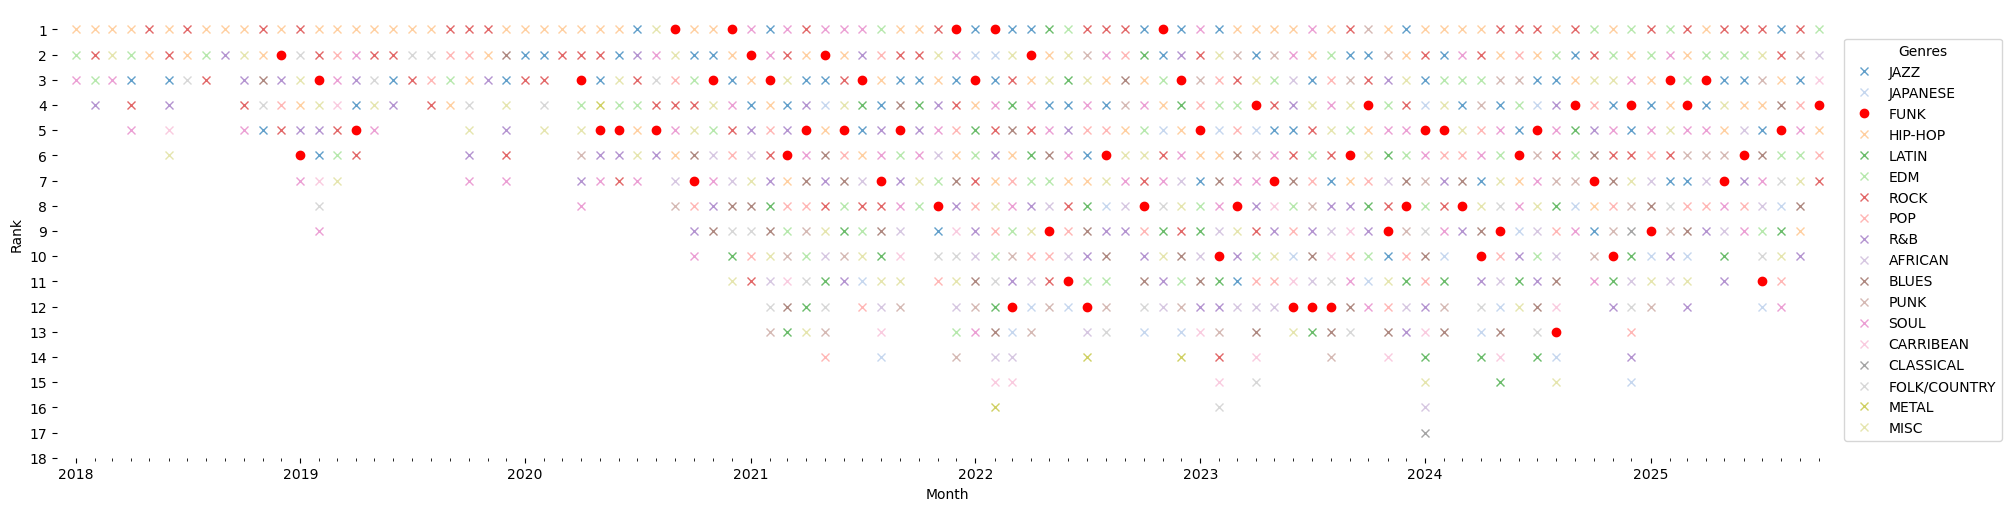

In [ ]:
highlight = 'FUNK'
xaxis_pad = pd.Timedelta('30D')

df_rank = df.replace(0, pd.NA).rank(
    ascending=False, 
    method = 'first', 
    na_option='keep',
    axis = 1
).sort_values(
    axis = 1, 
    by = pd.to_datetime('2022-01-01').date(),
    ascending=True
)

fig, ax = plt.subplots(figsize = (20,5))
cmap = matplotlib.colormaps.get_cmap('tab20')

for i, col in enumerate(df_rank):
    if col == highlight:
        ax.plot(
            df_rank[col], 
            color = 'r', 
            label = col,
            linestyle = 'None', 
            marker = 'o',
        )
    else:
        ax.plot(
            df_rank[col], 
            color = cmap(i), 
            label = col, 
            alpha = 0.7,
            linestyle = 'None', 
            marker = 'x'
        )

ax.set_yticks(range(1,19))


ax.set_xlim(df.index.min() - xaxis_pad, df.index.max() + xaxis_pad)
ax.invert_yaxis()
ax.legend(bbox_to_anchor = (1, 0.95), title = 'Genres')
#ax.set_title('Genre ranking timeseries')
ax.set_xlabel('Month')
ax.set_ylabel('Rank')
fig.set_constrained_layout(True)

# set axis box off
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator())
#ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter('%m'))

plt.show()

In [529]:
df_tracks

track_names              track_artist  \
0     Goodums - Sammy Virji Remix                 Unknown T   
1     Goodums - Sammy Virji Remix               Sammy Virji   
2           Send My Love to Linda              Jimi Hendrix   
3                        No Merci               Little Simz   
4                 Stunt Like This              Young Franco   
...                           ...                       ...   
6967                    Two Words                   Mos Def   
6968                    Two Words                   Freeway   
6969                    Two Words  The Boys Choir Of Harlem   
6970            Lie, Cheat, Steal            Run The Jewels   
6971           Look Mama I Did It            Injury Reserve   

              track_date_added             playlist_id playlist_name  \
0    2025-10-02 15:55:52+00:00  1ZuOGhyyL9u6nZMkrPOaXi  October 2025   
1    2025-10-02 15:55:52+00:00  1ZuOGhyyL9u6nZMkrPOaXi  October 2025   
2    2025-10-02 15:56:35+00:00  1ZuOGhyyL9u6nZMkrPOaXi  October 2025   
3    2025-10-02 15:56:46+00:00  1ZuOGhyyL9u6nZMkrPOaXi  October 2025   
4    2025-10-02 17:24:02+00:00  1ZuOGhyyL9u6nZMkrPOaXi  October 2025   
...                        ...                     ...           ...   
6967 2018-01-17 18:15:42+00:00  5IG5IXvM6LK8Q7U4Bsb738  january 2018   
6968 2018-01-17 18:15:42+00:00  5IG5IXvM6LK8Q7U4Bsb738  january 2018   
6969 2018-01-17 18:15:42+00:00  5IG5IXvM6LK8Q7U4Bsb738  january 2018   
6970 2018-01-31 17:23:09+00:00  5IG5IXvM6LK8Q7U4Bsb738  january 2018   
6971 2018-01-31 17:27:12+00:00  5IG5IXvM6LK8Q7U4Bsb738  january 2018   

      track_index  track_artists_index       track_artist_spid  \
0               1                    1  3iAhNz3e31lBuXYOsqGsf3   
1               1                    2  1GuqTQbuixFHD6eBkFwVcb   
2               2                    1  776Uo845nYHJpNaStv1Ds4   
3               3                    1  6eXZu6O7nAUA5z6vLV8NKI   
4               4                    1  6mK0vAO13gT8jWYANyoXAl   
...           ...                  ...                     ...   
6967           16                    2  0Mz5XE0kb1GBnbLQm2VbcO   
6968           16                    3  2Jwr7hGoSNK3S3QBxh3T0z   
6969           16                    4  7Cp14KBRtDwGucKNPUyT11   
6970           17                    1  4RnBFZRiMLRyZy0AzzTg2C   
6971           18                    1  3nf2EaHj8HikLNdaiW3v73   

                         track_album track_release_date  ... uk r&b  \
0        Goodums (Sammy Virji Remix)         2023-10-20  ...  False   
1        Goodums (Sammy Virji Remix)         2023-10-20  ...  False   
2              Both Sides of the Sky         2018-03-09  ...  False   
3                       NO THANK YOU         2022-12-12  ...  False   
4                    Stunt Like This         2024-10-10  ...  False   
...                              ...                ...  ...    ...   
6967  The College Dropout (Explicit)         2004-01-01  ...  False   
6968  The College Dropout (Explicit)         2004-01-01  ...  False   
6969  The College Dropout (Explicit)         2004-01-01  ...  False   
6970                Run the Jewels 2         2014-10-24  ...  False   
6971                           Floss         2016-12-15  ...  False   

      underground hip hop  vaporwave variété française villancicos vocal jazz  \
0                   False      False             False       False      False   
1                   False      False             False       False      False   
2                   False      False             False       False      False   
3                   False      False             False       False      False   
4                   False      False             False       False      False   
...                   ...        ...               ...         ...        ...   
6967                False      False             False       False      False   
6968                False      False             False       False      False   
6969                False

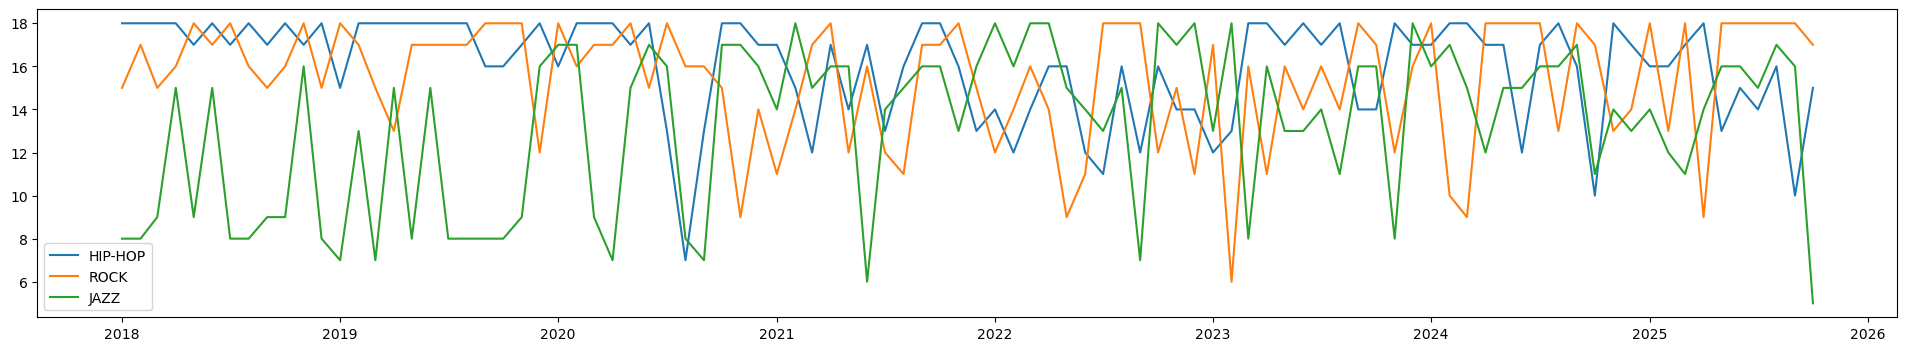

In [369]:
n_top = 3
df_top = df.rank(ascending=True, method = 'first', axis = 1)[df_gtcs[:n_top].index.to_list()]# + ['year', 'month']]
fig, ax = plt.subplots(figsize = (24,4))
#df_top.groupby(lambda x: x.year).agg(sum).plot(ax=ax)

for genre in df_top:
    ax.plot(df_top.index, df_top[genre], label = genre)
ax.legend()

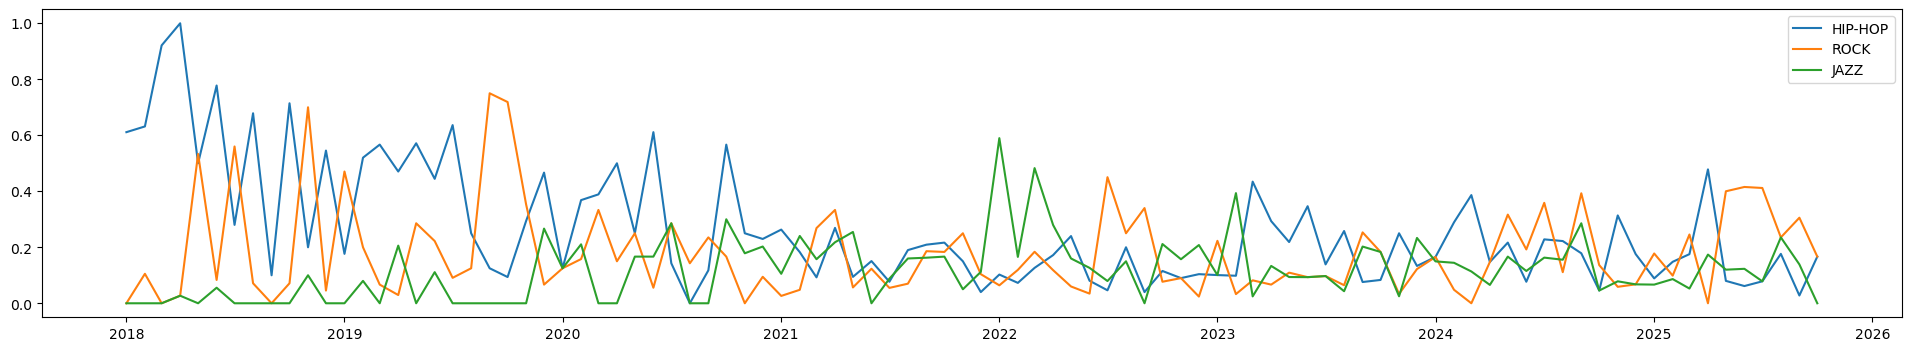

In [347]:
n_top = 3
df_top = df[df_gtcs[:n_top].index.to_list()]# + ['year', 'month']]
fig, ax = plt.subplots(figsize = (24,4))
#df_top.groupby(lambda x: x.year).agg(sum).plot(ax=ax)

for genre in df_top:
    ax.plot(df_top.index, df_top[genre], label = genre)
ax.legend()

<Axes: xlabel='playlist_date'>

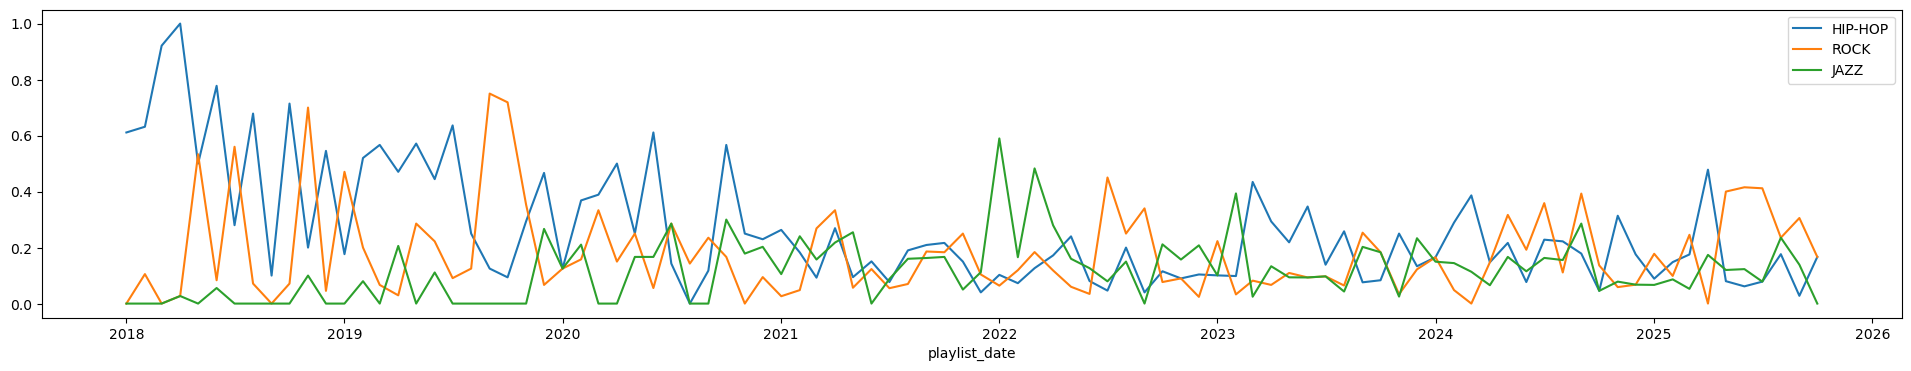

In [337]:
fig, ax = plt.subplots(figsize = (24,4))
df_top.plot(ax=ax)

In [130]:
df_tracks

track_names              track_artist  \
0     Goodums - Sammy Virji Remix                 Unknown T   
1     Goodums - Sammy Virji Remix               Sammy Virji   
2           Send My Love to Linda              Jimi Hendrix   
3                        No Merci               Little Simz   
4                 Stunt Like This              Young Franco   
...                           ...                       ...   
6967                    Two Words                   Mos Def   
6968                    Two Words                   Freeway   
6969                    Two Words  The Boys Choir Of Harlem   
6970            Lie, Cheat, Steal            Run The Jewels   
6971           Look Mama I Did It            Injury Reserve   

              track_date_added             playlist_id playlist_name  \
0    2025-10-02 15:55:52+00:00  1ZuOGhyyL9u6nZMkrPOaXi  October 2025   
1    2025-10-02 15:55:52+00:00  1ZuOGhyyL9u6nZMkrPOaXi  October 2025   
2    2025-10-02 15:56:35+00:00  1ZuOGhyyL9u6nZMkrPOaXi  October 2025   
3    2025-10-02 15:56:46+00:00  1ZuOGhyyL9u6nZMkrPOaXi  October 2025   
4    2025-10-02 17:24:02+00:00  1ZuOGhyyL9u6nZMkrPOaXi  October 2025   
...                        ...                     ...           ...   
6967 2018-01-17 18:15:42+00:00  5IG5IXvM6LK8Q7U4Bsb738  january 2018   
6968 2018-01-17 18:15:42+00:00  5IG5IXvM6LK8Q7U4Bsb738  january 2018   
6969 2018-01-17 18:15:42+00:00  5IG5IXvM6LK8Q7U4Bsb738  january 2018   
6970 2018-01-31 17:23:09+00:00  5IG5IXvM6LK8Q7U4Bsb738  january 2018   
6971 2018-01-31 17:27:12+00:00  5IG5IXvM6LK8Q7U4Bsb738  january 2018   

      track_index  track_artists_index       track_artist_spid  \
0               1                    1  3iAhNz3e31lBuXYOsqGsf3   
1               1                    2  1GuqTQbuixFHD6eBkFwVcb   
2               2                    1  776Uo845nYHJpNaStv1Ds4   
3               3                    1  6eXZu6O7nAUA5z6vLV8NKI   
4               4                    1  6mK0vAO13gT8jWYANyoXAl   
...           ...                  ...                     ...   
6967           16                    2  0Mz5XE0kb1GBnbLQm2VbcO   
6968           16                    3  2Jwr7hGoSNK3S3QBxh3T0z   
6969           16                    4  7Cp14KBRtDwGucKNPUyT11   
6970           17                    1  4RnBFZRiMLRyZy0AzzTg2C   
6971           18                    1  3nf2EaHj8HikLNdaiW3v73   

                         track_album track_release_date  ... uk r&b  \
0        Goodums (Sammy Virji Remix)         2023-10-20  ...  False   
1        Goodums (Sammy Virji Remix)         2023-10-20  ...  False   
2              Both Sides of the Sky         2018-03-09  ...  False   
3                       NO THANK YOU         2022-12-12  ...  False   
4                    Stunt Like This         2024-10-10  ...  False   
...                              ...                ...  ...    ...   
6967  The College Dropout (Explicit)         2004-01-01  ...  False   
6968  The College Dropout (Explicit)         2004-01-01  ...  False   
6969  The College Dropout (Explicit)         2004-01-01  ...  False   
6970                Run the Jewels 2         2014-10-24  ...  False   
6971                           Floss         2016-12-15  ...  False   

      underground hip hop  vaporwave variété française villancicos vocal jazz  \
0                   False      False             False       False      False   
1                   False      False             False       False      False   
2                   False      False             False       False      False   
3                   False      False             False       False      False   
4                   False      False             False       False      False   
...                   ...        ...               ...         ...        ...   
6967                False      False             False       False      False   
6968                False      False             False       False      False   
6969                False